# Relationship between COVID-19 & Happiness in the Coutry
------------------------------------------

We will work on whether there is any relationship between the spread of the coronavirus in a country and how happy people are living in that country or not.

We will work on two different datasets in order to answer the question.

1. The first dataset is COVID-19 dataset published by Johns Hopkins University.
2. The second dataset is dataset related to World Happiness Report.

### Let's Import the modules

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print('Modules are imported.')

Modules are imported.


In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Task 2

### Task 2.1: importing covid19 dataset
importing "Covid19_Confirmed_dataset.csv" from "./Dataset" folder.


In [63]:
corona_dataset_csv = pd.read_csv("/content/drive/MyDrive/ai-for-healthcare/covid-happiness/Dataset/RAW_global_confirmed_cases.csv")
corona_dataset_csv.head(10)

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,...,48053,48116,48229,48527,48718,48952,49161,49378,49621,49681
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,...,46061,46863,47742,48530,49191,50000,50637,51424,52004,52542
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,...,90579,91121,91638,92102,92597,93065,93507,93933,94371,94781
3,Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,...,7190,7236,7288,7338,7382,7382,7446,7466,7519,7560
4,Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,...,15925,16061,16161,16188,16277,16362,16407,16484,16562,16626
5,Antigua and Barbuda,NaN,17.06080,-61.796400,0,0,0,0,0,0,...,146,147,148,148,148,148,151,151,152,152
6,Argentina,NaN,-38.41610,-63.616700,0,0,0,0,0,0,...,1482216,1489328,1494602,1498160,1503222,1510203,1517046,1524372,1531374,1537169
7,Armenia,NaN,40.06910,45.038200,0,0,0,0,0,0,...,145240,146317,147312,148325,148682,149120,150218,151392,152253,153173
8,Australia,Australian Capital Territory,-35.47350,149.012400,0,0,0,0,0,0,...,117,117,117,117,117,117,117,117,117,117
9,Australia,New South Wales,-33.86880,151.209300,0,0,0,0,3,4,...,4633,4639,4642,4645,4650,4657,4666,4682,4712,4748


#### Let's check the shape of the dataframe

In [64]:
corona_dataset_csv.shape

(271, 337)

### Task 2.2: Delete the useless columns

In [65]:
df = corona_dataset_csv.drop(columns=["Lat","Long"],axis=1)

In [66]:
df.head(10)

,Country/Region,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20
0,Afghanistan,NaN,0,0,0,0,0,0,0,0,...,48053,48116,48229,48527,48718,48952,49161,49378,49621,49681
1,Albania,NaN,0,0,0,0,0,0,0,0,...,46061,46863,47742,48530,49191,50000,50637,51424,52004,52542
2,Algeria,NaN,0,0,0,0,0,0,0,0,...,90579,91121,91638,92102,92597,93065,93507,93933,94371,94781
3,Andorra,NaN,0,0,0,0,0,0,0,0,...,7190,7236,7288,7338,7382,7382,7446,7466,7519,7560
4,Angola,NaN,0,0,0,0,0,0,0,0,...,15925,16061,16161,16188,16277,16362,16407,16484,16562,16626
5,Antigua and Barbuda,NaN,0,0,0,0,0,0,0,0,...,146,147,148,148,148,148,151,151,152,152
6,Argentina,NaN,0,0,0,0,0,0,0,0,...,1482216,1489328,1494602,1498160,1503222,1510203,1517046,1524372,1531374,1537169
7,Armenia,NaN,0,0,0,0,0,0,0,0,...,145240,146317,147312,148325,148682,149120,150218,151392,152253,153173
8,Australia,Australian Capital Territory,0,0,0,0,0,0,0,0,...,117,117,117,117,117,117,117,117,117,117
9,Australia,New South Wales,0,0,0,0,3,4,4,4,...,4633,4639,4642,4645,4650,4657,4666,4682,4712,4748


### Task 2.3: Aggregating the rows by the country

In [67]:
corona_dataset_aggreageted = df.groupby(by="Country/Region").sum()

In [68]:
corona_dataset_aggreageted.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,48053,48116,48229,48527,48718,48952,49161,49378,49621,49681
Albania,0,0,0,0,0,0,0,0,0,0,...,46061,46863,47742,48530,49191,50000,50637,51424,52004,52542
Algeria,0,0,0,0,0,0,0,0,0,0,...,90579,91121,91638,92102,92597,93065,93507,93933,94371,94781
Andorra,0,0,0,0,0,0,0,0,0,0,...,7190,7236,7288,7338,7382,7382,7446,7466,7519,7560
Angola,0,0,0,0,0,0,0,0,0,0,...,15925,16061,16161,16188,16277,16362,16407,16484,16562,16626


In [69]:
corona_dataset_aggreageted.shape

(191, 334)

### Task 2.4: Visualizing data related to a country for example China
visualization always helps for better understanding of our data.

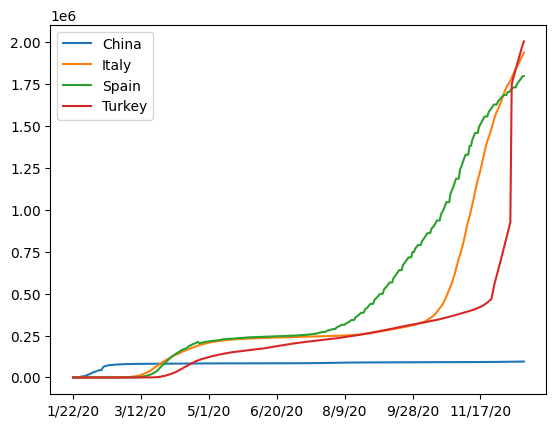

In [70]:
import matplotlib.pyplot as plt

# Select only numeric columns before plotting
numeric_data = corona_dataset_aggreageted.select_dtypes(include=['number'])

numeric_data.loc["China"].plot()
numeric_data.loc["Italy"].plot()
numeric_data.loc["Spain"].plot()
numeric_data.loc["Turkey"].plot()
plt.legend()

### Task3: Calculating a good measure
we need to find a good measure reperestend as a number, describing the spread of the virus in a country.

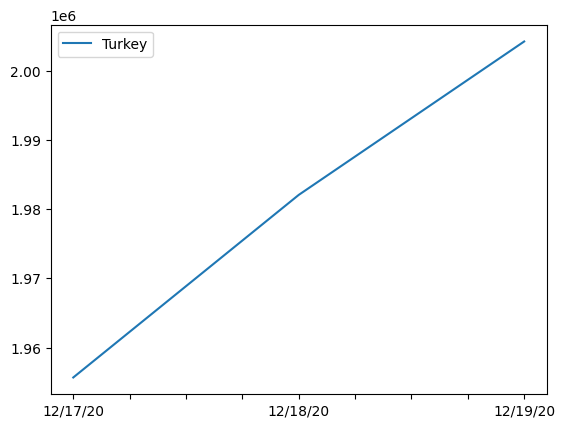

In [71]:
corona_dataset_aggreageted.loc["Turkey"][-3:].plot()
plt.legend()

### task 3.1: calculating the first derivative of the curve

<Axes: >

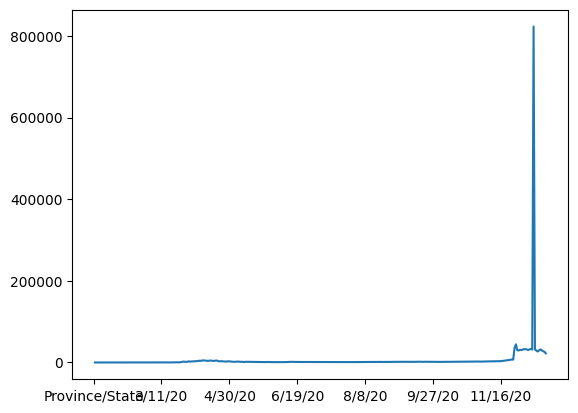

In [72]:
corona_dataset_aggreageted.loc["Turkey"].diff().plot()

### task 3.2: find maxmimum infection rate for China

In [73]:
corona_dataset_aggreageted.loc["Turkey"].diff().max()

823225

### Task 3.3: find maximum infection rate for all of the countries.

In [74]:
# Import necessary library for data type conversion
import pandas as pd

max_infection_rates = []
for c in countries:
    # Convert the relevant series to numeric before applying diff()
    series = pd.to_numeric(corona_dataset_aggreageted.loc[c], errors='coerce')
    max_infection_rates.append(series.diff().max())

In [75]:
corona_dataset_aggreageted["max_infection_rate"] = max_infection_rates

In [76]:
corona_dataset_aggreageted.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,48116,48229,48527,48718,48952,49161,49378,49621,49681,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,46863,47742,48530,49191,50000,50637,51424,52004,52542,879.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,91121,91638,92102,92597,93065,93507,93933,94371,94781,1133.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,7236,7288,7338,7382,7382,7446,7466,7519,7560,299.0
Angola,0,0,0,0,0,0,0,0,0,0,...,16061,16161,16188,16277,16362,16407,16484,16562,16626,355.0


### Task 3.4: create a new dataframe with only needed column

In [77]:
corona_data = pd.DataFrame(corona_dataset_aggreageted["max_infection_rate"])

In [78]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,915.0
Albania,879.0
Algeria,1133.0
Andorra,299.0
Angola,355.0


### Task4:
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis
- join the datasets
- calculate the correlations as the result of our analysis

### Task 4.1 : importing the dataset

In [79]:
happiness_report_csv = pd.read_csv("/content/drive/MyDrive/ai-for-healthcare/covid-happiness/Dataset/worldwide_happiness_report.csv")

In [80]:
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Task 4.2: let's drop the useless columns

In [81]:
useless_cols = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]

In [82]:
happiness_report_csv.drop(columns=useless_cols, axis=1, inplace=True)

In [83]:
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### Task 4.3: changing the indices of the dataframe

In [84]:
happiness_report_csv.set_index("Country or region", inplace=True)

In [85]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### Task4.4: now let's join two dataset we have prepared  

#### Corona Dataset :

In [86]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,915.0
Albania,879.0
Algeria,1133.0
Andorra,299.0
Angola,355.0


In [87]:
corona_data.shape

(191, 1)

#### wolrd happiness report Dataset :

In [88]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [89]:
happiness_report_csv.shape

(156, 4)

In [90]:
data = corona_data.join(happiness_report_csv,how="inner")
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,879.0,0.947,0.848,0.874,0.383
Algeria,1133.0,1.002,1.160,0.785,0.086
Argentina,18326.0,1.092,1.432,0.881,0.471
Armenia,2476.0,0.850,1.055,0.815,0.283


### Task 4.5: correlation matrix

In [91]:
data.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.116490,0.083619,0.088526,-0.091004
GDP per capita,0.116490,1.000000,0.757521,0.859431,0.394799
Social support,0.083619,0.757521,1.000000,0.751632,0.456317
Healthy life expectancy,0.088526,0.859431,0.751632,1.000000,0.423146
Freedom to make life choices,-0.091004,0.394799,0.456317,0.423146,1.000000


### Task 5: Visualization of the results
our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

In [92]:
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,879.0,0.947,0.848,0.874,0.383
Algeria,1133.0,1.002,1.160,0.785,0.086
Argentina,18326.0,1.092,1.432,0.881,0.471
Armenia,2476.0,0.850,1.055,0.815,0.283


### Task 5.1: Plotting GDP vs maximum Infection rate

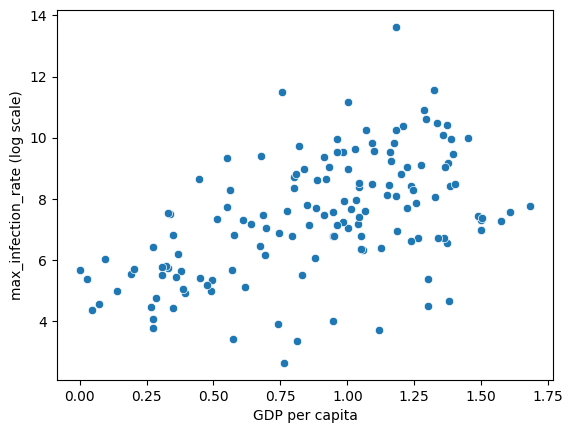

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your DataFrame

# Apply log transformation to the 'max_infection_rate' column
data['log_max_infection_rate'] = np.log(data['max_infection_rate'])

# Create the scatterplot using the transformed data
sns.scatterplot(x="GDP per capita", y="log_max_infection_rate", data=data)

# Optionally, set the y-axis label back to the original scale
plt.ylabel("max_infection_rate (log scale)")

plt.show()

<Axes: xlabel='GDP per capita', ylabel='max_infection_rate'>

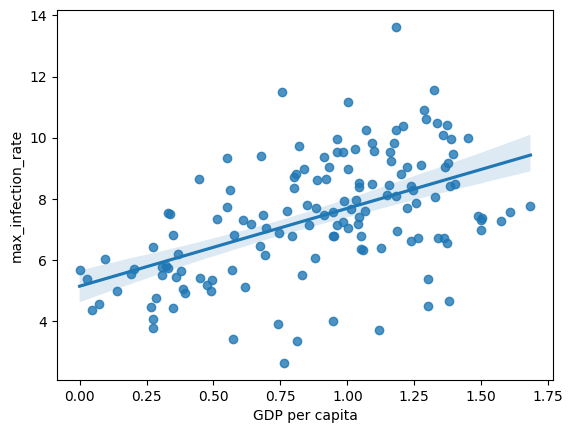

In [98]:
sns.regplot(x="GDP per capita", y=np.log(data['max_infection_rate']), data=data)

### Task 5.2: Plotting Social support vs maximum Infection rate

<Axes: xlabel='Social support', ylabel='max_infection_rate'>

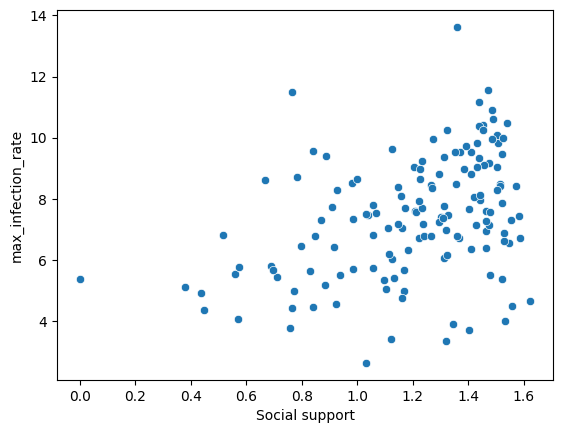

In [99]:
x = data["Social support"]
y = data["max_infection_rate"]

sns.scatterplot(x=data["Social support"], y=np.log(data["max_infection_rate"]))

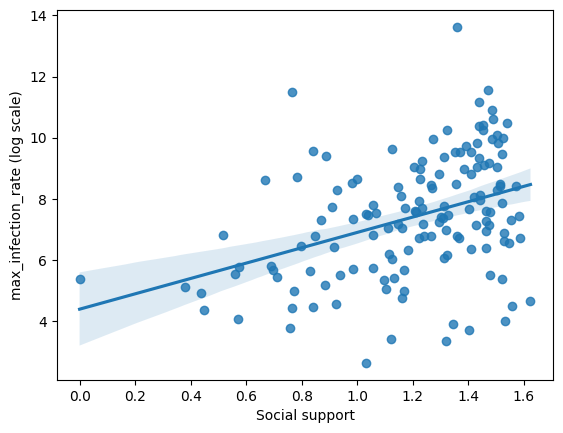

In [100]:
# Apply log transformation to 'max_infection_rate'
log_y = np.log(data["max_infection_rate"])

# Create the regression plot with log-transformed 'max_infection_rate'
sns.regplot(x=data["Social support"], y=log_y)

# Optionally, label the y-axis to indicate the log transformation
plt.ylabel("max_infection_rate (log scale)")

# Show the plot
plt.show()

### Task 5.3: Plotting Healthy life expectancy vs maximum Infection rate

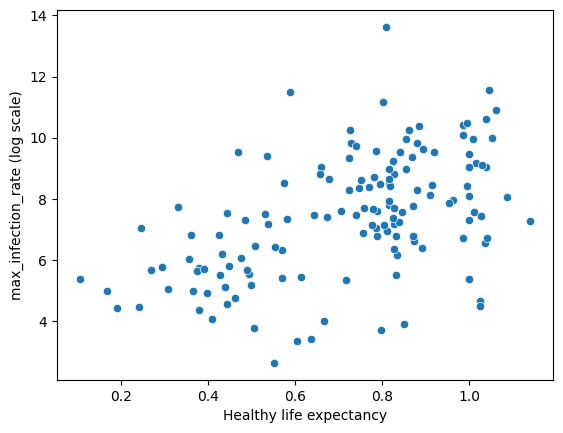

In [101]:
# Create the scatterplot using the log-transformed 'max_infection_rate'
sns.scatterplot(x=data["Healthy life expectancy"], y=np.log(data["max_infection_rate"]))

# Optionally, label the y-axis to indicate the log scale
plt.ylabel("max_infection_rate (log scale)")

# Show the plot
plt.show()

<Axes: xlabel='Healthy life expectancy', ylabel='max_infection_rate'>

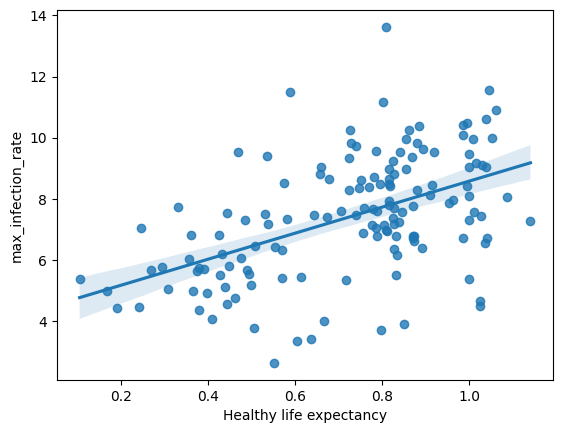

In [103]:
sns.regplot(x=data["Healthy life expectancy"], y=np.log(data["max_infection_rate"]))

### Task 5.4: Plotting Freedom to make life choices vs maximum Infection rate

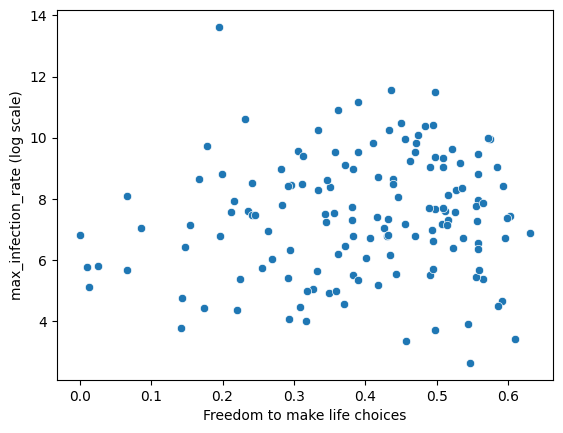

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your DataFrame with the necessary columns
x = data["Freedom to make life choices"]
y = data["max_infection_rate"]

# Create the scatterplot using keyword arguments
sns.scatterplot(x=x, y=np.log(y))

# Label the y-axis to indicate the log scale
plt.ylabel("max_infection_rate (log scale)")

# Show the plot
plt.show()

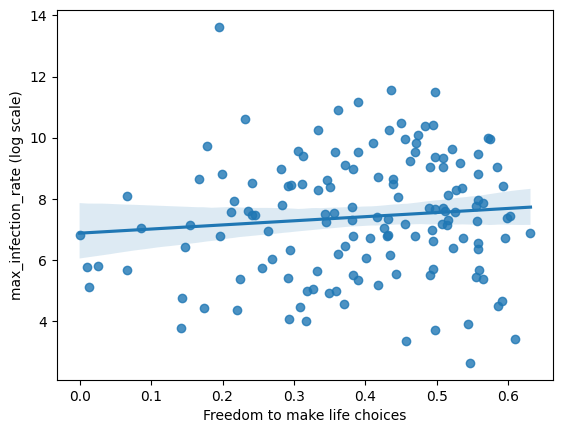

In [105]:
sns.regplot(x=x, y=np.log(y))

# Label the y-axis
plt.ylabel("max_infection_rate (log scale)")

# Show the plot
plt.show()